# Misleading Descriptive Statistics with Visualizations (Anscombe Quartet & Datasaurus Dozen)

Matplotlib versions of the Anscombe Quartet & Datasaurus Dozen that I use for my blog. (It's much more practical to do this in excel though).

[Wikipedia describing Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet) and [original paper](https://www.tandfonline.com/doi/abs/10.1080/00031305.1973.10478966)

[Official page linking to the Datasaurus Dozen Research](https://www.autodesk.com/research/publications/same-stats-different-graphs)

[Link to the original Datasaurus described by Cairo](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Datasaurus Dozen Using Matplotlib
This is usually the most interesting, so I'm going to put it first

In [2]:
datasaurus = pd.read_csv('data/DatasaurusDozen.tsv', sep='\t')
datasaurus_means = datasaurus.groupby(['dataset']).mean()
datasaurus_standard_dev = datasaurus.groupby(['dataset']).std()

In [3]:
def detailed_scatter(subplot, x, y, title):
    x_mean, x_std = x.mean(), x.std()
    y_mean, y_std = y.mean(), y.std()
    temp_corr = x.corr(y)
    # I prefer titles of my plots to be descriptive
    complete_title = "{}\n".format(title) + \
                 "x mean = {:.2f}, x std = {:.2f}\n".format(x_mean, x_std) + \
                 "y mean = {:.2f}, y std = {:.2f}\n".format(y_mean, y_std) + \
                 "correlation = {:.2f}\n".format(temp_corr)
    subplot.scatter(x, y, c='black') 
    subplot.set_title(complete_title, pad=-990)
    subplot.set_xlabel('x')
    subplot.set_ylabel('y')
    return

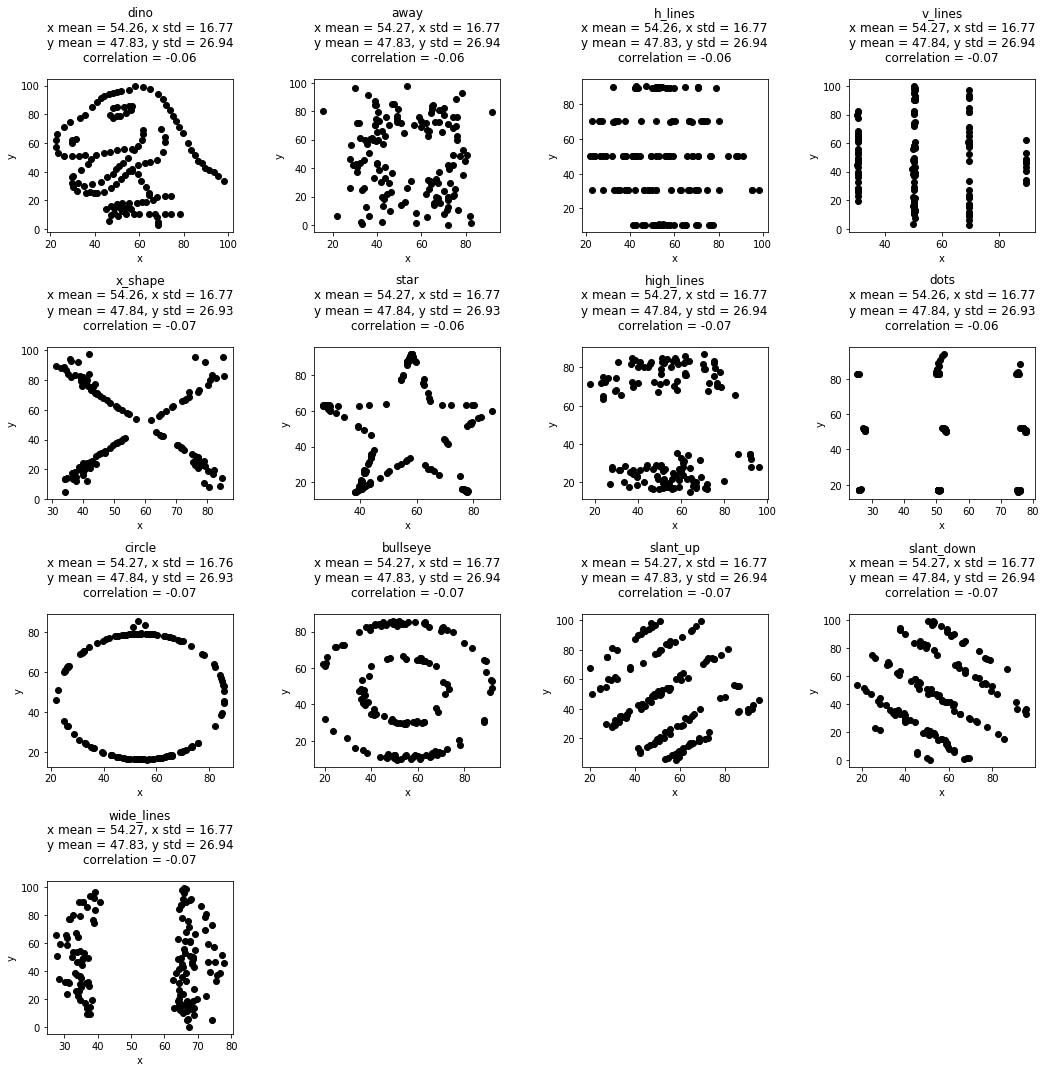

In [4]:
categories = pd.unique(datasaurus['dataset'])
fig, axs = plt.subplots(4,4, figsize=(15,15))
fig.subplots_adjust(wspace=0.9, hspace=0.9)
for x in range(4):
    for y in range(4):
        if((x * 4) + y >= len(categories)):
            fig.delaxes(axs[x, y])
        else:
            temp_category = categories[(x * 4) + y]
            temp_x = datasaurus[datasaurus['dataset'] == temp_category]['x']
            temp_y = datasaurus[datasaurus['dataset'] == temp_category]['y']
            detailed_scatter(axs[x,y], temp_x, temp_y, temp_category)
fig.tight_layout()
plt.savefig('generated_figures/datasaurus_dozen.png')

# Anscombe Quartet

In [5]:
quartet = pd.read_csv('data/anscombe_quartet.csv', sep=',')
quartet_means = quartet.groupby(['dataset']).mean()
quartet_standard_dev = quartet.groupby(['dataset']).std()
print(quartet_means)
print(quartet_standard_dev)

           x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909
                x         y
dataset                    
I        3.316625  2.031568
II       3.316625  2.031657
III      3.316625  2.030424
IV       3.316625  2.030579


In [6]:
def scatter_with_trendline(subplot, x, y, title):
    detailed_scatter(subplot, x, y, title)
    fitted_reg = np.poly1d(np.polyfit(x, y, 1))
    subplot.plot(x, fitted_reg(x), 'r', label='{}'.format(fitted_reg))
    subplot.legend(loc='lower right')
    return

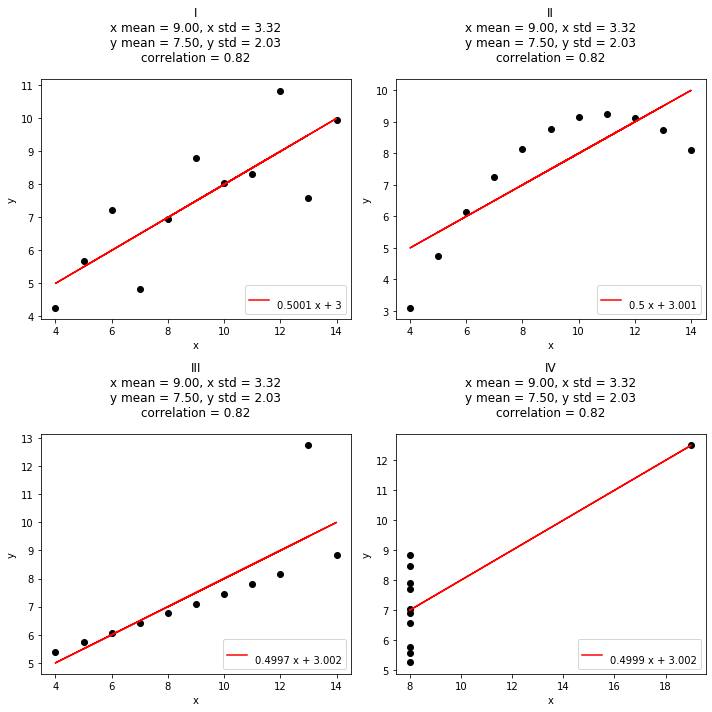

In [7]:
cat = pd.unique(quartet['dataset'])
fig, axs = plt.subplots(2,2, figsize=(10,10))
fig.subplots_adjust(wspace=0.5, hspace=0.5)
for x in range(2):
    for y in range(2):
        temp_category = cat[(x * 2) + y]
        temp_x = quartet[quartet['dataset'] == temp_category]['x']
        temp_y = quartet[quartet['dataset'] == temp_category]['y']
        scatter_with_trendline(axs[x, y],temp_x, temp_y, temp_category)
plt.tight_layout()
plt.savefig('generated_figures/quartet2.png')